## Let's Import All necessery libraraies

In [1]:
# Time Series Analysis 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
sns.set_style("darkgrid")

# Advanced Analysis 
from itertools import combinations
import matplotlib.dates as mdates
from datetime import datetime
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

## Load data from csv file

In [2]:
def load_data(filename):
    ## Let's load the dataset
    if ".csv" not in filename:
        filename=filename+".csv"
    try:
        df1=pd.read_csv(filename,parse_dates=True,index_col=["Time"])
    except:
        df1=pd.read_csv(filename)
        tempPD = pd.read_csv(filename,parse_dates=True,index_col=["Time"])
        df1.index = 
#     print(df1.head())
#     print(df1.tail())
    return df1

In [3]:
## As you can see all the values in our dataframe is string let's convert it into floating point value
def parse_columns(x):
    try:
        return np.float32(x)
    except:
        return np.float32(x.replace(",",""))

## Let's preprocess our data

In [4]:
def preprocess_data(df):
    df = df.replace(['-'],'0')
    for col in df.columns:
        df[col]=df[col].apply(lambda x : parse_columns(x))
    return df

## Plot the data

In [5]:
def plot_data(df):
    df.plot(figsize=(20,10))
    for col in df.columns:
       df[col].plot(figsize=(20,10),fontsize=13,color="green")
       plt.ylabel(col,fontsize=15)
       plt.xlabel("Time",fontsize=15)
       plt.show()

## Let's Use Inter Quantile Range Method In order to get Outlier

In [6]:
def detect_outlier_usingIQR(df1):
    plt.suptitle("Let's Detect Outlier using IQR Forest",fontsize=25)
    for col in df1.columns:
       iqr=df1[col].quantile(0.75)-df1[col].quantile(0.25)
       lower_limit=df1[col].quantile(0.25)-(iqr*1.5)
       upper_limit=df1[col].quantile(0.75)+(iqr*1.5)
       temp=df1[(df1[col] > upper_limit) | (df1[col] < lower_limit)][col]
       if len(temp)> 0:
          print(f"There are total {len(temp)} outliers in {col} columns")
          df1[col].plot(figsize=(20,10),fontsize=13,color="yellow")
          plt.scatter(x=temp.index,y=temp.values,s=50,c="red",alpha=1)
          plt.ylabel(col,fontsize=15)
          plt.xlabel("Time",fontsize=15)
          plt.show()
       else:
          print(f"There is no outlier in {col}\n")

## Let's Use Isolation Forest to detect Outlier

In [7]:
def detect_outlier_usingIsolation_forest(df1, i):
    if i != -1:
        outlier_fraction=0.05
        plt.suptitle("Let's Detect Outlier using Isolation Forest",fontsize=25)
        df1.to_csv(f"training/Well {i} with predictions.csv")
        for col in df1.columns:
            model=IsolationForest(contamination=outlier_fraction)
            model.fit(df1[col].values.reshape(-1,1))
            p=model.predict(df1[col].values.reshape(-1,1))
            temp=df1[p==-1][col]
            df10 =load_data(f"training/Well {i} with predictions.csv")
            df10[f"{col} anomaly"] = p
            df10.to_csv(f"training/Well {i} with predictions.csv")
        if len(temp)> 0:
            print(f"There are total {len(temp)} outliers in {col} columns")
            df1[col].plot(figsize=(20,10),fontsize=13,color="green")
            plt.scatter(x=temp.index,y=temp.values,s=50,c="red",alpha=1)
            plt.ylabel(col,fontsize=15)
            plt.xlabel("Time",fontsize=15)
            plt.show()
        else:
            print(f"There is no outlier in {col}\n")
    else:
        outlier_fraction=0.05
        plt.suptitle("Let's Detect Outlier using Isolation Forest",fontsize=25)
        df1.to_csv(f"training/simulated_data with predictions.csv")
        for col in df1.columns:
            model=IsolationForest(contamination=outlier_fraction)
            model.fit(df1[col].values.reshape(-1,1))
            p=model.predict(df1[col].values.reshape(-1,1))
            temp=df1[p==-1][col]
            df10 =load_data(f"training/simulated_data with predictions.csv")
            df10[f"{col} anomaly"] = p
            df10.to_csv(f"training/simulated_data with predictions.csv")
        if len(temp)> 0:
            print(f"There are total {len(temp)} outliers in {col} columns")
            df1[col].plot(figsize=(20,10),fontsize=13,color="green")
            plt.scatter(x=temp.index,y=temp.values,s=50,c="red",alpha=1)
            plt.ylabel(col,fontsize=15)
            plt.xlabel("Time",fontsize=15)
            plt.show()
        else:
            print(f"There is no outlier in {col}\n")
     


## Let's use Kmeans Clustering to get outliers

In [8]:
def detect_outlier_usingKMeans(df1):
    outlier_fraction=0.05
    plt.suptitle("Let's Detect Outlier using Kmeans",fontsize=25)
    """ Function that calculates the distance between a point and centroid of a cluster, 
            returns the distances in pandas series"""
    for col in df1.columns:
      model=KMeans(n_clusters=1,random_state=100)
      model.fit(df1[col].values.reshape(-1,1))
      distance = []
      for i in range(0,len(df1)):
          Xa = np.array(df1[col].iloc[i])
          Xb = model.cluster_centers_[model.labels_[i]]
          distance.append(np.linalg.norm(Xa-Xb))
      return pd.Series(distance, index=df1.index)

There are total 36 outliers in Motor Temperature columns


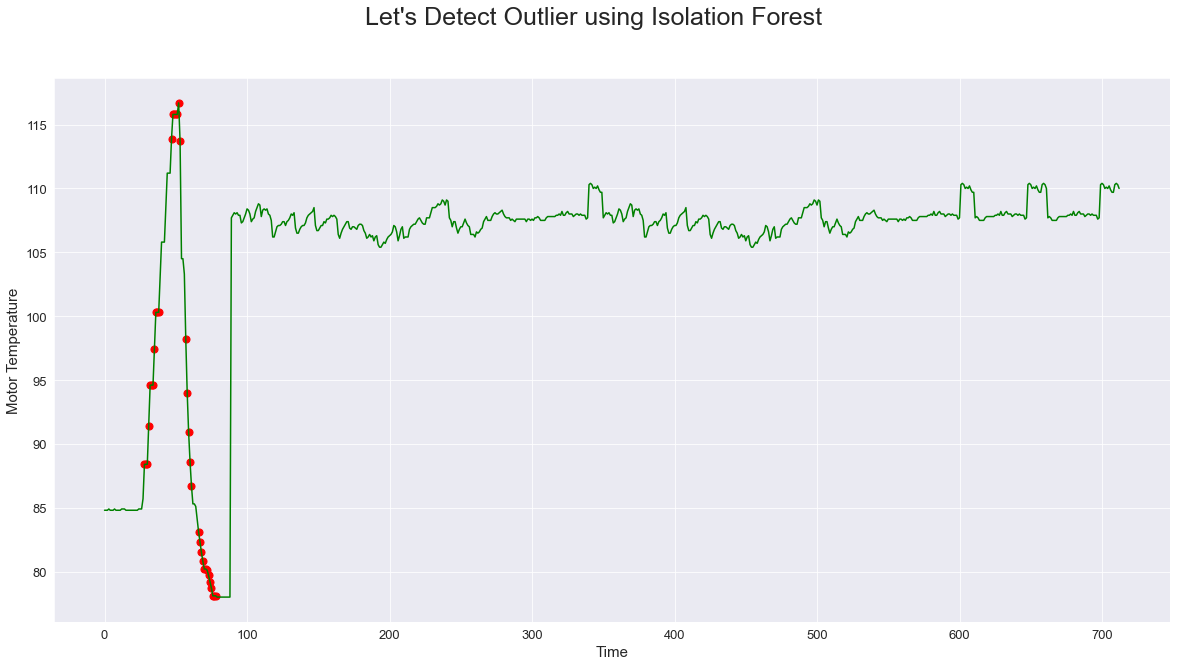

In [9]:
if __name__ == "__main__":
    # code_run_mode 0 for training on 14 wells / 1 for simulated data
    code_run_mode = 1
    if code_run_mode == 0:
        for i in range(1,15):
            df=load_data(f"training/Well {i}.csv")
            df=preprocess_data(df)
            detect_outlier_usingIsolation_forest(df,i)
    else:
        df=load_data(f"training/simulated_data.csv")
        df=preprocess_data(df)
        i = -1
        detect_outlier_usingIsolation_forest(df,i)

In [25]:
# Advanced Analysis

In [26]:
def scale_data(df):
    sc=StandardScaler()
    cols=df.columns
    inds=df.index
    values=sc.fit_transform(df)
    return pd.DataFrame(values,columns=cols,index=inds), sc

In [27]:
def perform_pca(df,n_components):
    pca=PCA(n_components=n_components)
    pca.fit(df)
    plt.bar(x=range(1,n_components+1),height=pca.explained_variance_ratio_,color="grey")
    plt.xticks(range(1,n_components+1),[f"PCA{n}" for n in range(1,n_components+1)])
    plt.title("Explained variance Ratio",fontsize=12)
    return pca,pca.transform(df)

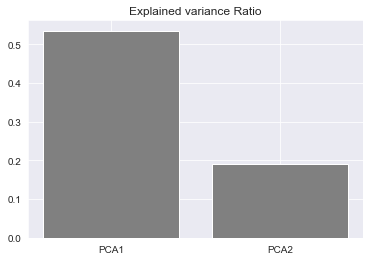

In [28]:
if code_run_mode == 0:
    for x in range(1,15):
        filename = f"training/Well {x}.csv"
        df1=load_data(filename)
        df1=preprocess_data(df1)
        df2 = df1
        df1.drop('WHP [psi]', axis='columns', inplace=True)
        df1.drop('V_MOTOR', axis='columns', inplace=True)
        df1.drop('VIBRATION', axis='columns', inplace=True)
        df1.drop('FLP [psi]', axis='columns', inplace=True)
        df1,scalar=scale_data(df1)
        pca,df1_pca=perform_pca(df1,2)
        detector=IsolationForest(contamination=0.01,random_state=0)## You could choose any value between 0 and 1 according to % of outlier
        detector.fit(df1_pca)
        prediction=detector.predict(df1_pca)
        dfdb = pd.DataFrame(df1_pca, columns = ['PCA1','PCA2'])
        dfdb.index = df2.index
        dfdb["Anomoly"]=prediction
        df2 = load_data(f"training/Well {x} with predictions")
        df_final = pd.concat([df2, dfdb], axis=1)
        df_final.to_csv(f"training/Well {x} with PCA.csv")
else:
    filename = "training/simulated_data.csv"
    df1=load_data(filename)
    df1=preprocess_data(df1)
    df2 = df1
    df1,scalar=scale_data(df1)
    pca,df1_pca=perform_pca(df1,2)
    detector=IsolationForest(contamination=0.01,random_state=0)## You could choose any value between 0 and 1 according to % of outlier
    detector.fit(df1_pca)
    prediction=detector.predict(df1_pca)
    dfdb = pd.DataFrame(df1_pca, columns = ['PCA1','PCA2'])
    dfdb.index = df2.index
    dfdb["Anomoly"]=prediction
    df2 = load_data(f"training/simulated_data with predictions.csv")
    df_final = pd.concat([df2, dfdb], axis=1)
    df_final.to_csv(f"training/simulated_data with PCA.csv")

In [29]:
times=df1.index
t = [mdates.date2num(datetime.strptime(str(i), "%Y-%m-%d %H:%M:%S")) for i in times]
fig, ax = plt.subplots(figsize=(10,8))
sc = ax.scatter(df1_pca[:,0],df1_pca[:,1], c=t[:])

loc = mdates.AutoDateLocator()
fig.colorbar(sc, ticks=loc,format=mdates.AutoDateFormatter(loc))


ValueError: time data '0' does not match format '%Y-%m-%d %H:%M:%S'

In [ ]:
plt.scatter(df1_pca[:-1,0][prediction[:-1]==-1],df1_pca[:-1,1][prediction[:-1]==-1],label="outlier",color="yellow")
plt.scatter(df1_pca[:-1,0][prediction[:-1]==1],df1_pca[:-1,1][prediction[:-1]==1],label="data",color="purple")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend()

In [ ]:
# Save the model and our pca 
import pickle
with open("Model.pkl","wb") as f:
    pickle.dump(detector,f)
with open("PCA_Transform.pkl","wb") as f:
    pickle.dump(pca,f)
with open("Scalar.pkl","wb") as f:
    pickle.dump(scalar,f)